In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

**Data Exploring**

In [119]:
# Reading data
df=pd.read_csv("wfp_food_prices_ind.csv")
df.head(5)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2550
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9880
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976


In [120]:
# Rename a few columns 
df=df.rename(columns={'admin1':'State','admin2':'City'})
df.head(5)

,date,State,City,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2550
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9880
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976


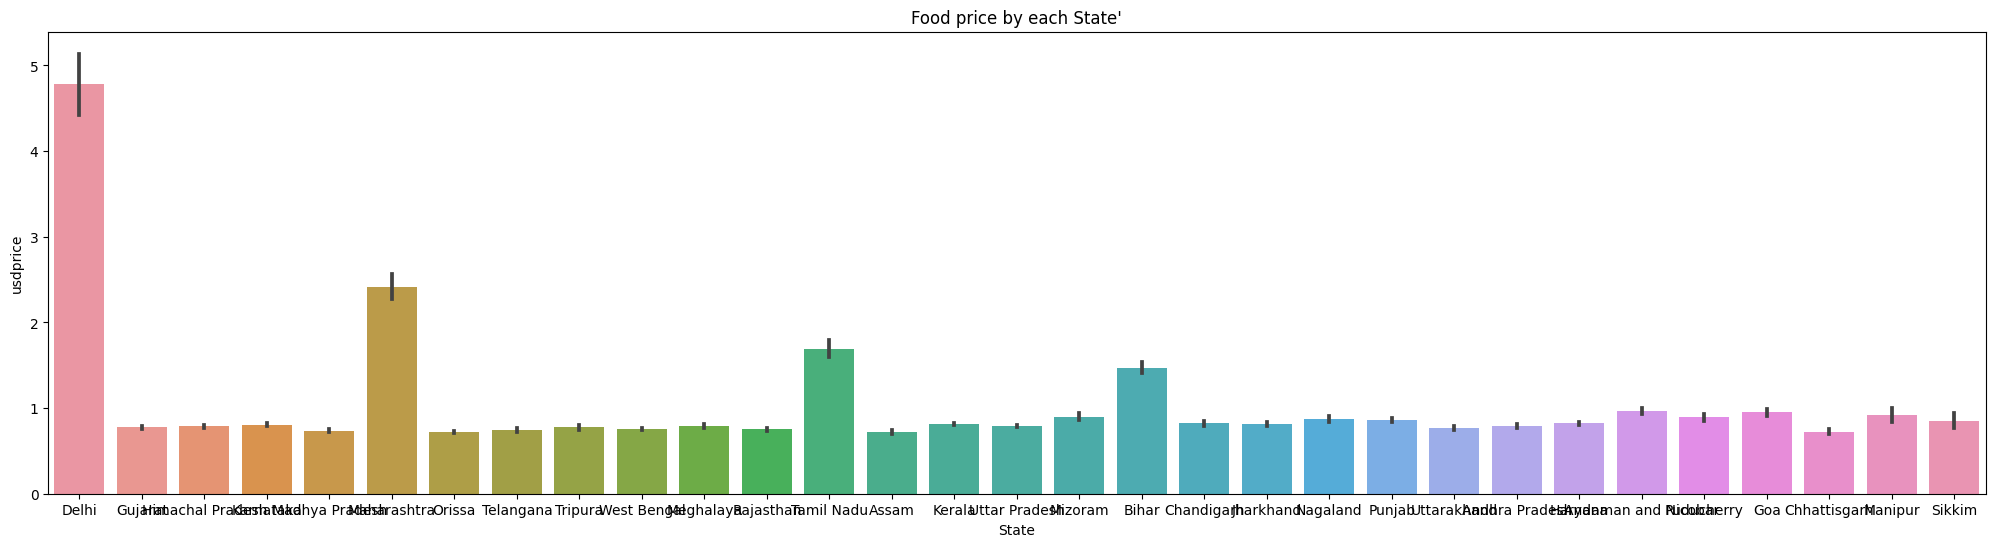

In [121]:
plt.figure(figsize=(25, 6))
sns.barplot(data=df, x='State', y='usdprice')
plt.title("Food price by each State'")
plt.show()

**Preprocessing Data**

In [122]:
df.isna().sum()

date           0
State        672
City         672
market         0
latitude     672
longitude    672
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [123]:
df.isna().sum()

date           0
State        672
City         672
market         0
latitude     672
longitude    672
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [124]:
df.isnull().sum()

date           0
State        672
City         672
market         0
latitude     672
longitude    672
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [125]:
df=df.dropna(subset=['State'])

In [126]:
df.isnull().sum()

date         0
State        0
City         0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

**Decision Tree Model**

In [127]:
df=df[['State', 'City', 'category', 'unit', 'usdprice']]
df.head(5)

,State,City,category,unit,usdprice
0,Delhi,Delhi,cereals and tubers,KG,0.2550
1,Delhi,Delhi,cereals and tubers,KG,0.1594
2,Delhi,Delhi,oil and fats,KG,0.9880
3,Gujarat,Ahmadabad,cereals and tubers,KG,0.2167
4,Gujarat,Ahmadabad,cereals and tubers,KG,0.1976


In [128]:
# Defining variables dependents and independents
X = pd.get_dummies(df[['State', 'City', 'unit', 'category']], drop_first=True)
y = df['usdprice']
X.head(5)


,State_Andhra Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,...,City_West Imphal,City_West Midnapore,City_West Tripura,unit_KG,unit_L,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [129]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
model_Food = DecisionTreeRegressor(random_state=42)
model_Food.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [131]:
y_pred = model_Food.predict(X_test)
pd.Series(y_pred).head(5)
print(len(y_pred))

44949


In [132]:
print(len(y_test))

44949


In [133]:
print(len(X_test))

44949


In [134]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')

Mean Squared Error: 1.535546981174691
r2: 0.8554823028810744


In [135]:
X_test['usdprice_pred']=y_pred
X_test['usdprice_real']=y_test
X_test.head(5)

,State_Andhra Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,...,City_West Tripura,unit_KG,unit_L,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,usdprice_pred,usdprice_real
58130,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0.758821,2.8049
160822,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1.251709,1.2561
213129,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1.454539,0.0000
152502,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0.212154,0.3409
174748,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1.272548,0.0000


In [136]:
joblib.dump(model_Food, 'food_prediction.joblib')

['food_prediction.joblib']